In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
"As you can see, the data is organized by order, with multiple products ordered by the same user ID.  I'm going to reframe the data into a pivot table to organize it by User_ID.

SyntaxError: EOL while scanning string literal (<ipython-input-3-81ada8822707>, line 1)

In [56]:
df1.isna().any()

User_ID                       False
City_Category                 False
Occupation                    False
Stay_In_Current_City_Years    False
Gender                        False
Age                           False
Purchase                      False
dtype: bool

In [24]:
df1 = df.groupby(['User_ID'], as_index=False).agg({'City_Category':'first', 'Occupation':'first', 'Stay_In_Current_City_Years':'first', 'Gender':'first','Age':'first','Purchase':'sum'})
df1.head()
#print(len(df1))

,User_ID,City_Category,Occupation,Stay_In_Current_City_Years,Gender,Age,Purchase
0,1000001,A,10,2,F,0-17,333481
1,1000002,C,16,4+,M,55+,810353
2,1000003,A,15,3,M,26-35,341635
3,1000004,B,7,2,M,46-50,205987
4,1000005,A,20,1,M,26-35,821001


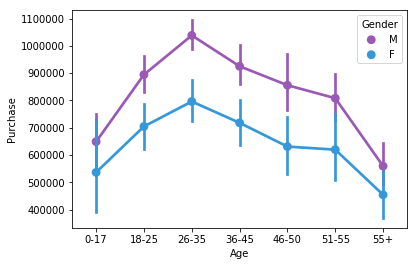

In [82]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.countplot(df1['Gender'], hue=df1['Age'], palette=flatui)
sns.pointplot(x=df1['Age'], y=df1['Purchase'], hue=df1['Gender'], palette=flatui, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], hue_order=['M','F'])

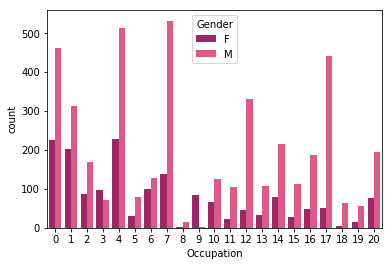

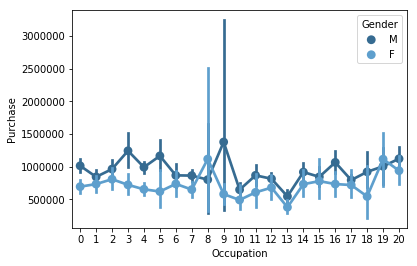

In [127]:
sns.countplot(df1['Occupation'], hue=df1['Gender'], palette="Accent_d")
plt.show()
sns.pointplot(x=df1['Occupation'], y=df1['Purchase'], hue=df1['Gender'], palette="Blues_d", hue_order=['M','F'])
plt.show()